In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fn = 'heart_2022_with_nans'
data = pd.read_csv(f'~/110-F25/project/C-HeartDisease/{fn}.csv')
df = data.filter(['SmokerStatus','ECigaretteUsage','HadHeartAttack','HadStroke','HadAsthma'])
df.head()

,SmokerStatus,ECigaretteUsage,HadHeartAttack,HadStroke,HadAsthma
0,Never smoked,Not at all (right now),No,No,No
1,Never smoked,Never used e-cigarettes in my entire life,No,No,No
2,Never smoked,Never used e-cigarettes in my entire life,No,No,No
3,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,No,No,Yes
4,Never smoked,Never used e-cigarettes in my entire life,No,No,No


In [3]:
# assigning numerical values to SmokerStatus and ECigaretteUsage
smoker_lookup = {
    "Never smoked": 0,
    "Former smoker": 1,
    "Current smoker - now smokes some days": 2,
    "Current smoker - now smokes every day": 3
}

ecig_lookup = {
    "Never used e-cigarettes in my entire life": 0,
    "Not at all (right now)": 1,
    "Some days": 2,
    "Every day": 3
}

smoker_nums = []
ecig_nums = []

# looping through the columns to assign the numerical value
for i in range(len(df)):
    smoker_text = df.loc[i, "SmokerStatus"]
    ecig_text = df.loc[i, "ECigaretteUsage"]

    smoker_nums.append(smoker_lookup.get(smoker_text))
    ecig_nums.append(ecig_lookup.get(ecig_text))

df["SmokerStatus"] = smoker_nums
df["ECigaretteUsage"] = ecig_nums

# adding both column - the mean of SmokerStatus and ECigaretteUsage
df["Both"] = (df["SmokerStatus"] + df["ECigaretteUsage"]) / 2

df.head()

,SmokerStatus,ECigaretteUsage,HadHeartAttack,HadStroke,HadAsthma,Both
0,0.0,1.0,No,No,No,0.5
1,0.0,0.0,No,No,No,0.0
2,0.0,0.0,No,No,No,0.0
3,2.0,0.0,No,No,Yes,1.0
4,0.0,0.0,No,No,No,0.0


In [4]:
disease_lookup = {
    "No": 0,
    "Yes": 1,
}

HA_nums = []
ST_nums = []
AS_nums = []

for i in range(len(df)):
    HA_text = df.loc[i, 'HadHeartAttack']
    ST_text = df.loc[i, 'HadStroke']
    AS_text = df.loc[i, 'HadAsthma']

    HA_nums.append(disease_lookup.get(HA_text))
    ST_nums.append(disease_lookup.get(ST_text))
    AS_nums.append(disease_lookup.get(AS_text))

df['HA'] = HA_nums
df['ST'] = ST_nums
df['AS'] = AS_nums

disease_nums = []

for i in range(len(df)):
    HA = df.loc[i, 'HA']
    ST = df.loc[i, 'ST']
    AS = df.loc[i, 'AS']

    if HA + ST + AS == 0:
        # no disease
        disease_nums.append(0)
    elif HA == 1 and ST == 0 and AS == 0:
        # heart attack only
        disease_nums.append(1)
    elif HA == 0 and ST == 1 and AS == 0:
        # stroke only
        disease_nums.append(2)
    elif HA == 0 and ST == 0 and AS == 1:
        # asthma only
        disease_nums.append(3)          
    else:
        # multiple diseases
        disease_nums.append(4)          

df['Disease'] = disease_nums

df.head()

,SmokerStatus,ECigaretteUsage,HadHeartAttack,HadStroke,HadAsthma,Both,HA,ST,AS,Disease
0,0.0,1.0,No,No,No,0.5,0.0,0.0,0.0,0
1,0.0,0.0,No,No,No,0.0,0.0,0.0,0.0,0
2,0.0,0.0,No,No,No,0.0,0.0,0.0,0.0,0
3,2.0,0.0,No,No,Yes,1.0,0.0,0.0,1.0,3
4,0.0,0.0,No,No,No,0.0,0.0,0.0,0.0,0


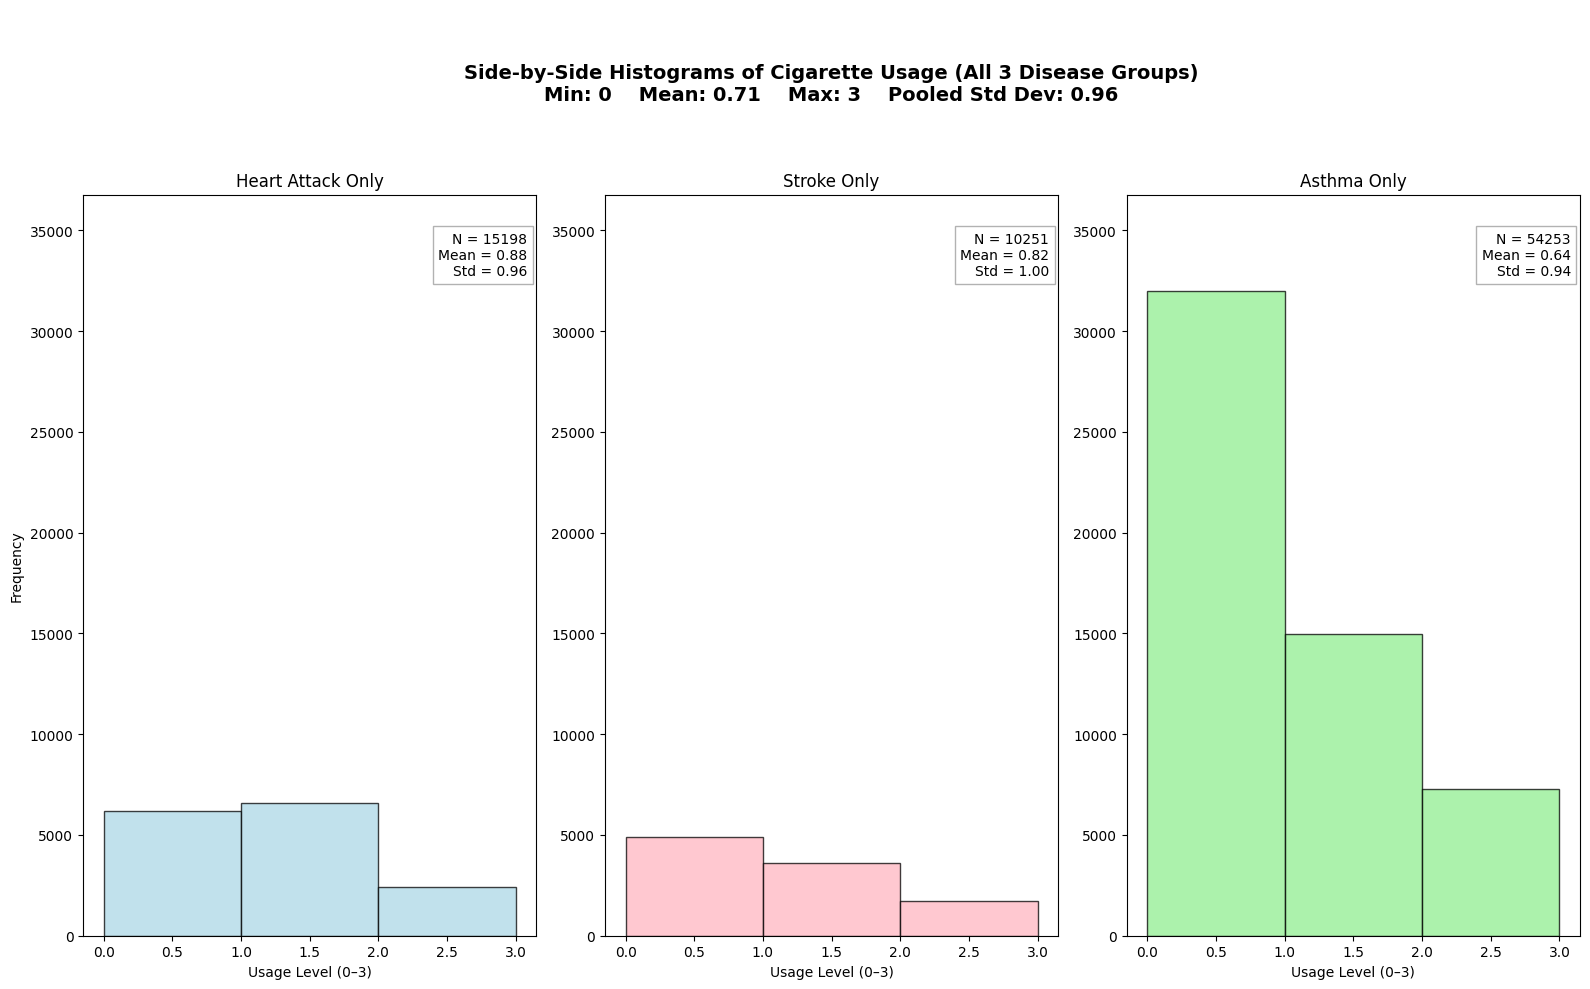

In [6]:
df_plot = df[df["Disease"].isin([1, 2, 3])]

palette2 = {
    1: "#ADD8E6",
    2: "#FFB6C1",
    3: "#90EE90"
}

disease_labels = {
    1: "Heart Attack Only",
    2: "Stroke Only",
    3: "Asthma Only"
}

fig = plt.figure(figsize=(16, 10))
grid = fig.add_gridspec(2, 3, height_ratios=[0.2, 1.0])

# -----------------------------
# HEADER
# -----------------------------
ax_header = fig.add_subplot(grid[0, :])

overall_min = df_plot["SmokerStatus"].min()
overall_mean = df_plot["SmokerStatus"].mean()
overall_max = df_plot["SmokerStatus"].max()
overall_std = df_plot["SmokerStatus"].std()

ax_header.axis("off")
ax_header.text(
    0.5, 0.5,
    (
        f"Side-by-Side Histograms of Cigarette Usage (All 3 Disease Groups)\n"
        f"Min: {overall_min:.0f}    "
        f"Mean: {overall_mean:.2f}    "
        f"Max: {overall_max:.0f}    "
        f"Pooled Std Dev: {overall_std:.2f}"
    ),
    ha="center", va="center", fontsize=14, fontweight="bold"
)

# -----------------------------
# SHARED Y-AXIS SCALE CALCULATION
# -----------------------------
bins = np.arange(0, 4, 1)

# compute max bin height across all groups
max_height = 0
for d in [1, 2, 3]:
    counts, _ = np.histogram(
        df_plot[df_plot["Disease"] == d]["SmokerStatus"],
        bins=bins
    )
    max_height = max(max_height, counts.max())

# add a little space
max_height = max_height * 1.15

# -----------------------------
# HISTOGRAMS
# -----------------------------
for i, d in enumerate([1, 2, 3]):
    ax = fig.add_subplot(grid[1, i])

    subset = df_plot[df_plot["Disease"] == d]["SmokerStatus"]

    ax.hist(
        subset,
        bins=bins,
        color=palette2[d],
        edgecolor="black",
        alpha=0.75
    )

    # Shared Y-axis scale
    ax.set_ylim(0, max_height)

    # Titles & labels
    ax.set_title(disease_labels[d], fontsize=12)
    ax.set_xlabel("Usage Level (0–3)")
    if i == 0:
        ax.set_ylabel("Frequency")

    # Stats box
    stats_text = (
        f"N = {subset.count()}\n"
        f"Mean = {subset.mean():.2f}\n"
        f"Std = {subset.std():.2f}"
    )

    ax.text(
        0.98, 0.95, stats_text,
        transform=ax.transAxes,
        ha="right", va="top",
        fontsize=10,
        bbox=dict(facecolor="white", edgecolor="gray", alpha=0.6)
    )

plt.tight_layout()
plt.show()

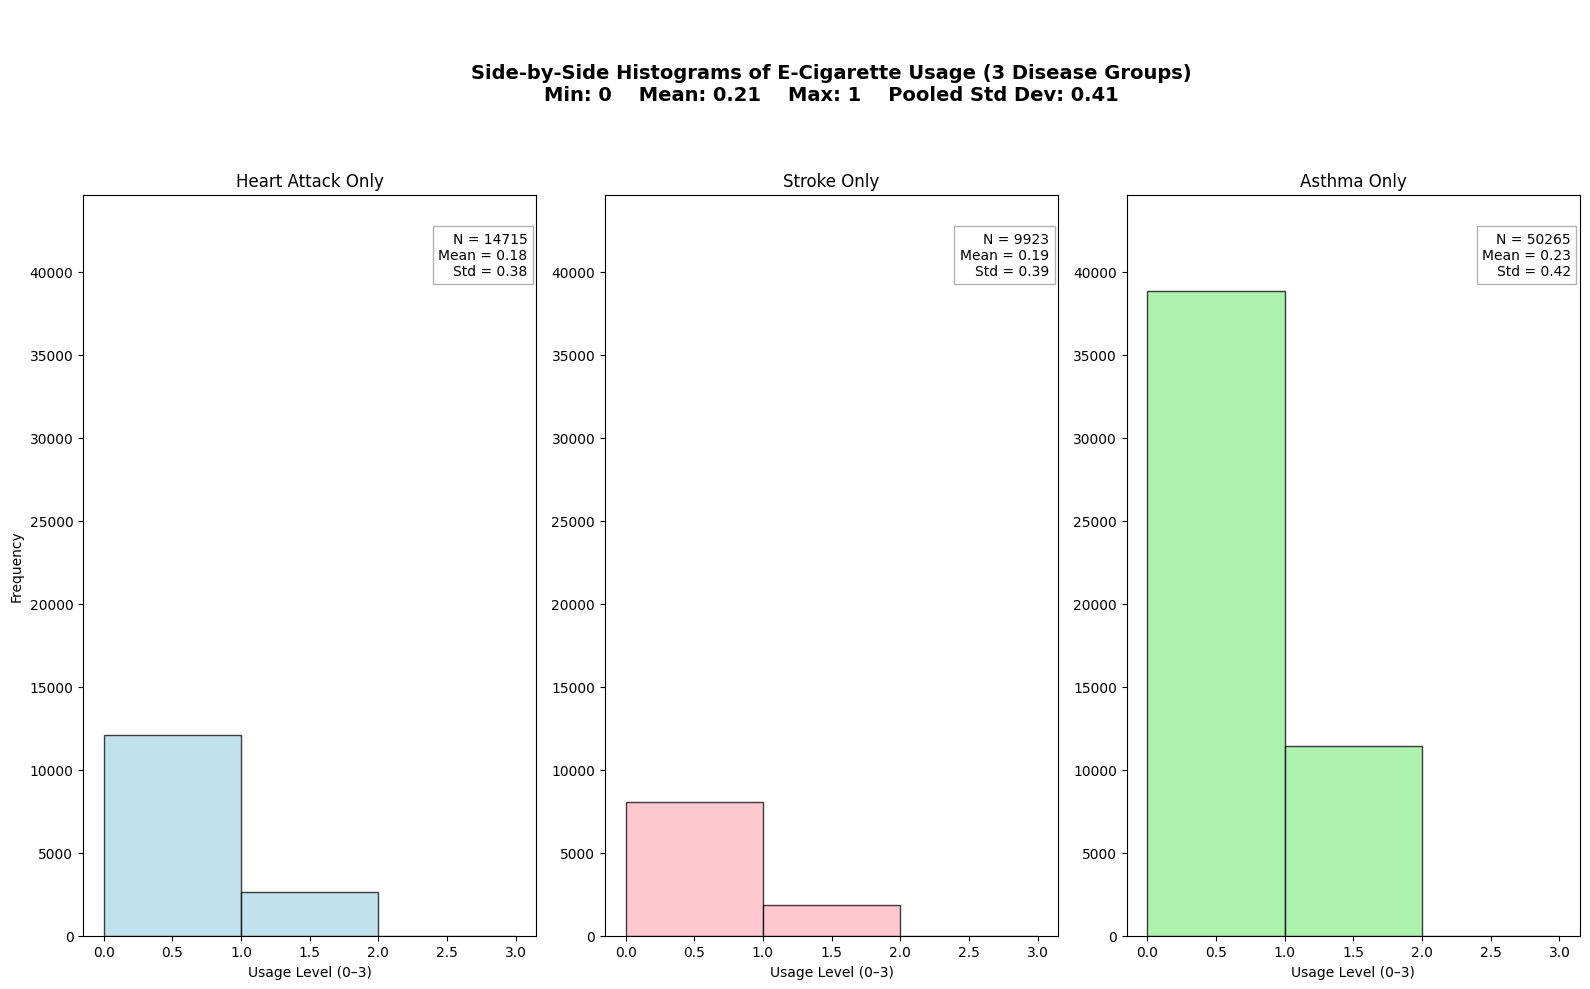

In [7]:
df_plot = df[df["Disease"].isin([1, 2, 3])]

palette2 = {
    1: "#ADD8E6",
    2: "#FFB6C1",
    3: "#90EE90"
}

disease_labels = {
    1: "Heart Attack Only",
    2: "Stroke Only",
    3: "Asthma Only"
}

fig = plt.figure(figsize=(16, 10))
grid = fig.add_gridspec(2, 3, height_ratios=[0.2, 1.0])

# -----------------------------
# HEADER
# -----------------------------
ax_header = fig.add_subplot(grid[0, :])

overall_min = df_plot["ECigaretteUsage"].min()
overall_mean = df_plot["ECigaretteUsage"].mean()
overall_max = df_plot["ECigaretteUsage"].max()
overall_std = df_plot["ECigaretteUsage"].std()

ax_header.axis("off")
ax_header.text(
    0.5, 0.5,
    (
        f"Side-by-Side Histograms of E-Cigarette Usage (3 Disease Groups)\n"
        f"Min: {overall_min:.0f}    "
        f"Mean: {overall_mean:.2f}    "
        f"Max: {overall_max:.0f}    "
        f"Pooled Std Dev: {overall_std:.2f}"
    ),
    ha="center", va="center", fontsize=14, fontweight="bold"
)

# -----------------------------
# SHARED Y-AXIS SCALE CALCULATION
# -----------------------------
bins = np.arange(0, 4, 1)

# compute max bin height across all groups
max_height = 0
for d in [1, 2, 3]:
    counts, _ = np.histogram(
        df_plot[df_plot["Disease"] == d]["ECigaretteUsage"],
        bins=bins
    )
    max_height = max(max_height, counts.max())

# add a little space
max_height = max_height * 1.15

# -----------------------------
# HISTOGRAMS
# -----------------------------
for i, d in enumerate([1, 2, 3]):
    ax = fig.add_subplot(grid[1, i])

    subset = df_plot[df_plot["Disease"] == d]["ECigaretteUsage"]

    ax.hist(
        subset,
        bins=bins,
        color=palette2[d],
        edgecolor="black",
        alpha=0.75
    )

    # Shared Y-axis scale
    ax.set_ylim(0, max_height)

    # Titles & labels
    ax.set_title(disease_labels[d], fontsize=12)
    ax.set_xlabel("Usage Level (0–3)")
    if i == 0:
        ax.set_ylabel("Frequency")

    # Stats box
    stats_text = (
        f"N = {subset.count()}\n"
        f"Mean = {subset.mean():.2f}\n"
        f"Std = {subset.std():.2f}"
    )

    ax.text(
        0.98, 0.95, stats_text,
        transform=ax.transAxes,
        ha="right", va="top",
        fontsize=10,
        bbox=dict(facecolor="white", edgecolor="gray", alpha=0.6)
    )

plt.tight_layout()
plt.show()

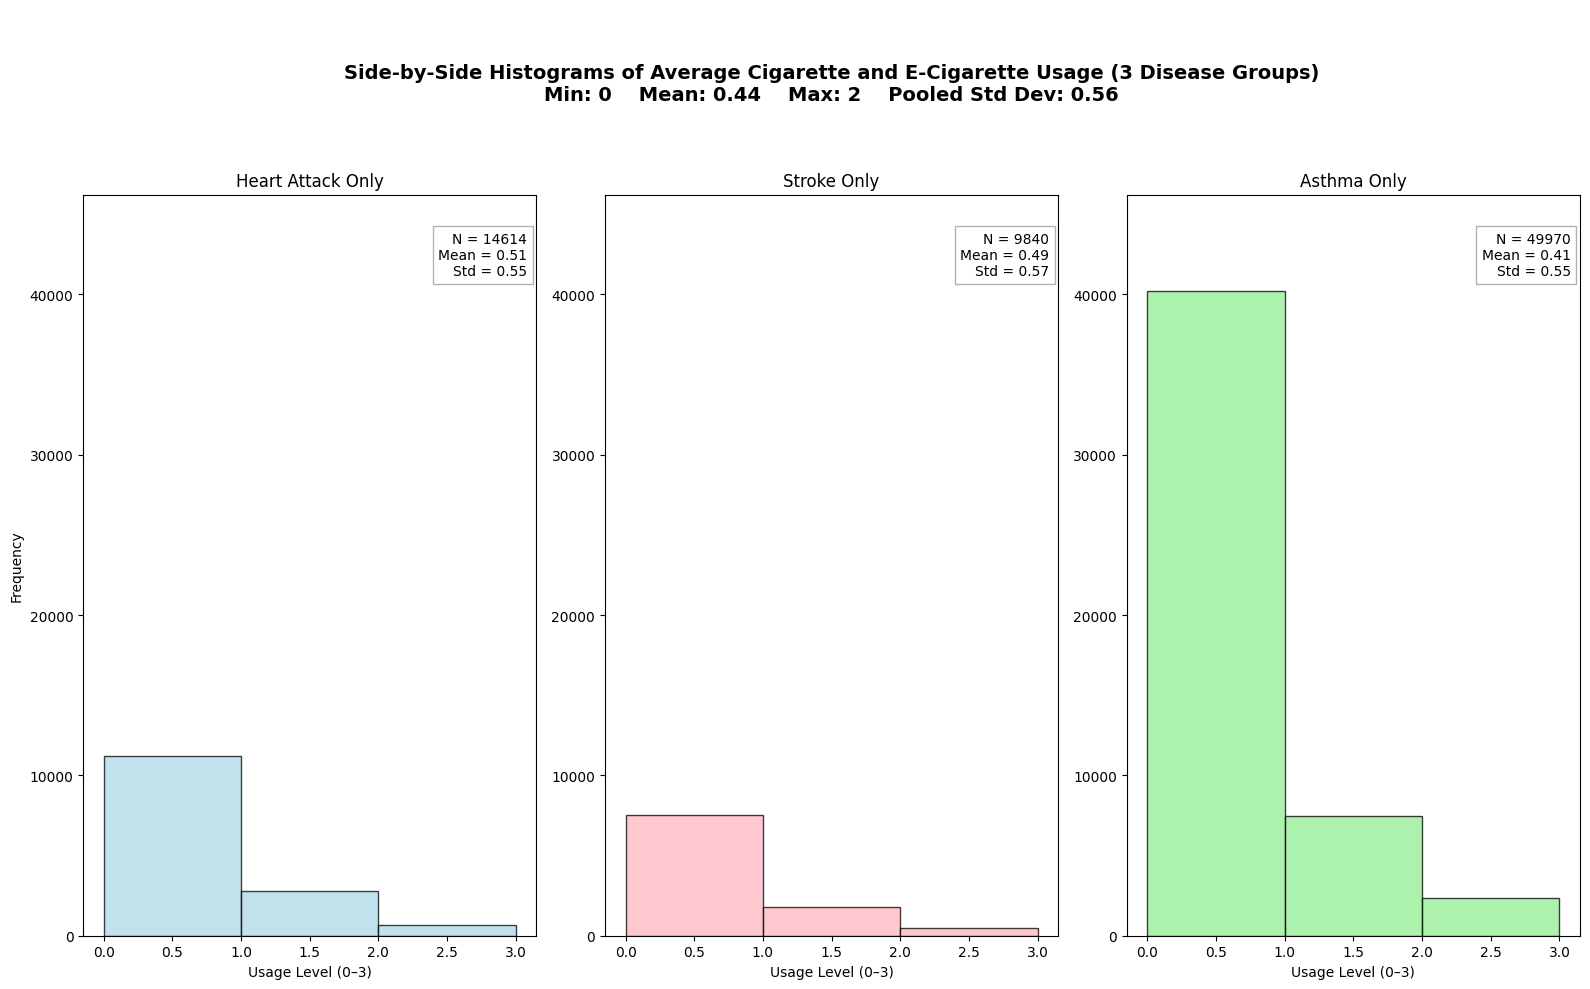

In [9]:
df_plot = df[df["Disease"].isin([1, 2, 3])]

palette2 = {
    1: "#ADD8E6",
    2: "#FFB6C1",
    3: "#90EE90"
}

disease_labels = {
    1: "Heart Attack Only",
    2: "Stroke Only",
    3: "Asthma Only"
}

fig = plt.figure(figsize=(16, 10))
grid = fig.add_gridspec(2, 3, height_ratios=[0.2, 1.0])

# -----------------------------
# HEADER
# -----------------------------
ax_header = fig.add_subplot(grid[0, :])

overall_min = df_plot["Both"].min()
overall_mean = df_plot["Both"].mean()
overall_max = df_plot["Both"].max()
overall_std = df_plot["Both"].std()

ax_header.axis("off")
ax_header.text(
    0.5, 0.5,
    (
        f"Side-by-Side Histograms of Average Cigarette and E-Cigarette Usage (3 Disease Groups)\n"
        f"Min: {overall_min:.0f}    "
        f"Mean: {overall_mean:.2f}    "
        f"Max: {overall_max:.0f}    "
        f"Pooled Std Dev: {overall_std:.2f}"
    ),
    ha="center", va="center", fontsize=14, fontweight="bold"
)

# -----------------------------
# SHARED Y-AXIS SCALE CALCULATION
# -----------------------------
bins = np.arange(0, 4, 1)

# compute max bin height across all groups
max_height = 0
for d in [1, 2, 3]:
    counts, _ = np.histogram(
        df_plot[df_plot["Disease"] == d]["Both"],
        bins=bins
    )
    max_height = max(max_height, counts.max())

# add a little space
max_height = max_height * 1.15

# -----------------------------
# HISTOGRAMS
# -----------------------------
for i, d in enumerate([1, 2, 3]):
    ax = fig.add_subplot(grid[1, i])

    subset = df_plot[df_plot["Disease"] == d]["Both"]

    ax.hist(
        subset,
        bins=bins,
        color=palette2[d],
        edgecolor="black",
        alpha=0.75
    )

    # Shared Y-axis scale
    ax.set_ylim(0, max_height)

    # Titles & labels
    ax.set_title(disease_labels[d], fontsize=12)
    ax.set_xlabel("Usage Level (0–3)")
    if i == 0:
        ax.set_ylabel("Frequency")

    # Stats box
    stats_text = (
        f"N = {subset.count()}\n"
        f"Mean = {subset.mean():.2f}\n"
        f"Std = {subset.std():.2f}"
    )

    ax.text(
        0.98, 0.95, stats_text,
        transform=ax.transAxes,
        ha="right", va="top",
        fontsize=10,
        bbox=dict(facecolor="white", edgecolor="gray", alpha=0.6)
    )

plt.tight_layout()
plt.show()

In [10]:
from scipy.stats import f_oneway

# Keep only Disease groups 1, 2, and 3
df_anova = df[df["Disease"].isin([1, 2, 3])]

# Function to run and print ANOVA for any variable
def run_anova(varname):
    g1 = df_anova[df_anova["Disease"] == 1][varname].dropna()
    g2 = df_anova[df_anova["Disease"] == 2][varname].dropna()
    g3 = df_anova[df_anova["Disease"] == 3][varname].dropna()

    f_stat, p_val = f_oneway(g1, g2, g3)

    print(f"\n========================================")
    print(f"ANOVA: {varname} by Disease")
    print(f"========================================")
    print(f"F-statistic: {f_stat:.4f}")
    print(f"P-value:     {p_val:.6f}\n")

    print("Group Means:")
    print(f"Disease 1 (Heart Attack Only): {g1.mean():.4f}")
    print(f"Disease 2 (Stroke Only):       {g2.mean():.4f}")
    print(f"Disease 3 (Asthma Only):       {g3.mean():.4f}")
    print("----------------------------------------")


# ---------------------------------------
# Run the three ANOVAs
# ---------------------------------------
run_anova("SmokerStatus")       
run_anova("ECigaretteUsage")   
run_anova("Both")                  


ANOVA: SmokerStatus by Disease
F-statistic: 436.9704
P-value:     0.000000

Group Means:
Disease 1 (Heart Attack Only): 0.8776
Disease 2 (Stroke Only):       0.8166
Disease 3 (Asthma Only):       0.6421
----------------------------------------

ANOVA: ECigaretteUsage by Disease
F-statistic: 102.7483
P-value:     0.000000

Group Means:
Disease 1 (Heart Attack Only): 0.1795
Disease 2 (Stroke Only):       0.1867
Disease 3 (Asthma Only):       0.2278
----------------------------------------

ANOVA: Both by Disease
F-statistic: 230.4538
P-value:     0.000000

Group Means:
Disease 1 (Heart Attack Only): 0.5148
Disease 2 (Stroke Only):       0.4860
Disease 3 (Asthma Only):       0.4116
----------------------------------------
